## Day 1
### Normal Equation

In [60]:
# let's look at training using linear regression
# y = theta_0 + theta_1*x is the general form of linear regression
# thetas are the parameters of the model and there are two ways to get these parameter;
# one is by closed form solving the direct equation which is called Normal Equation
# and the other is by iterative optimization approach by using Gradient Descent approach

#### The Normal Equation Approach

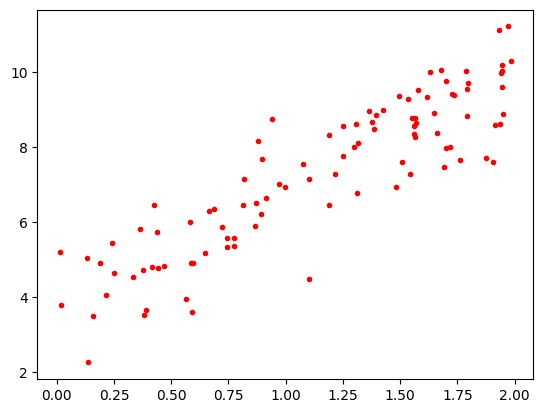

In [61]:
# let's generate some linear looking data
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.plot(X,y,'.',color='red')

random.rand generate data from a uniform distribution whereas random.randn generate data from standard normal distribution

In [62]:
# normal equation has a form theta = (X^TX)^(-1)X^T y
X_b = np.c_[np.ones((100,1)), X] # add bias = 1 to each instances
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.7138485],
       [3.0944008]])

[[3.7138485]
 [9.9026501]]


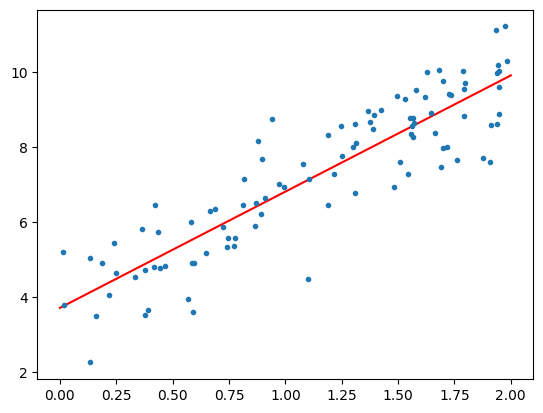

In [63]:
# we would have hoped for theta to be 4 and 3 but we got 4.14 and 2.91 which is close enough 
# but the noise made it impossible to get back the actual parameters
# now let us make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'.')

In [64]:
# same thing using scikit learn
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()
lrg.fit(X,y)
print(lrg.intercept_,"bias;",lrg.coef_,'weights')

[3.7138485] bias; [[3.0944008]] weights


In [65]:
# for prediction 
lrg.predict(X_new)

array([[3.7138485],
       [9.9026501]])

# Day 2
### <span style='color.red'>Gradient Descent</span>

It is a general optimization algorith applicable to wide set of problems.  
General idea is to tweek parameters iteratively to minimize the cost function.  
There are three types of GD we will discuss about,  
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent


Batch Gradient Descent :  

Gradient descent for the whole batch  
theta = theta - eta * gradient

[[3.70787669]
 [3.09891773]] ----- calculated parameters
[[3.7138485]
 [3.0944008]] ----- calculated parameters
[[-1.76110508e+181]
 [-2.32834827e+181]] ----- calculated parameters


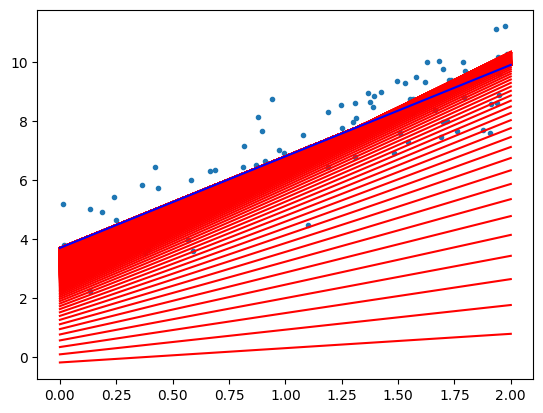

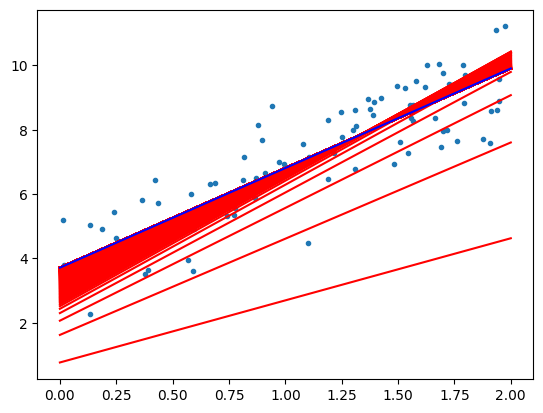

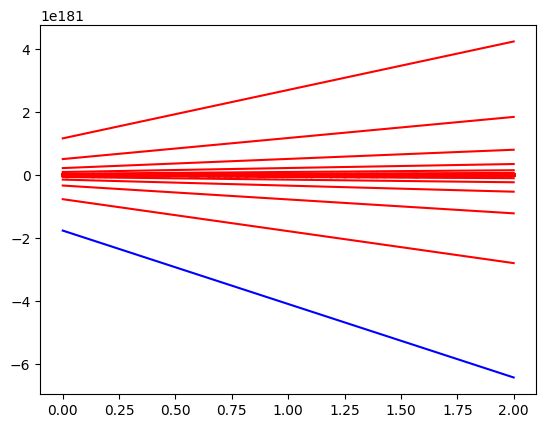

<Figure size 640x480 with 0 Axes>

In [66]:

eta = [0.02, 0.1, 0.5]
n_iterations = 1000
m = 100

for rate in eta:
    plt.plot(X,y,'.')
    theta = np.random.randn(2,1)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - rate * gradients
        y_predict_intm = X_new_b.dot(theta)
        if iteration == 999:
            plt.plot(X_new,y_predict_intm,'b-')
        else:
            plt.plot(X_new,y_predict_intm,'r-')
    print(theta, "----- calculated parameters")
    plt.figure()
